In [1]:
# https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

In [2]:
import numpy as np
from qiskit import *
%matplotlib inline

In [3]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

In [4]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting the qubits in a GHZ state.
circ.cx(0, 2)

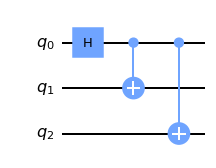

In [5]:
circ.draw('mpl')

In [6]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In [7]:
# Create a Quantum Program for execution
job = execute(circ, backend)

In [8]:
result = job.result()

In [9]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.707+0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j 0.   +0.j
 0.707+0.j]


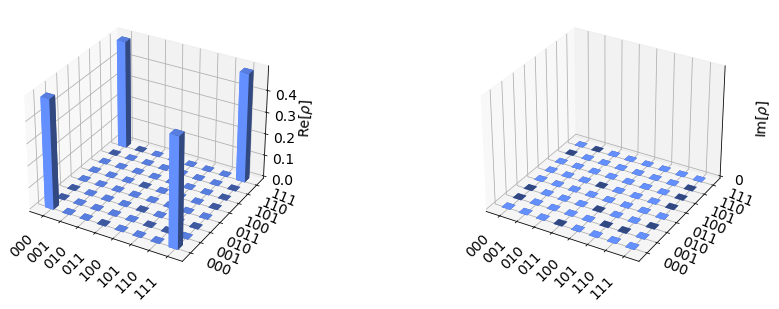

In [10]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [11]:
# Qiskit Aer also includes a unitary_simulator that works provided all the elements in the circuit are unitary operations. 
# This backend calculates the 2n×2n matrix representing the gates in the quantum circuit.

# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

[[ 0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j -0.707+0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.707+0.j  0.707-0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]
 [ 0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.707+0.j  0.707-0.j]
 [ 0.707+0.j -0.707+0.j  0.   +0.j  0.   +0.j  0.   +0.j  0.   +0.j
   0.   +0.j  0.   +0.j]]


In [12]:
# QC with measurement
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))

# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw()

<ipython-input-12-8688d8ef7e2c>:10: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = circ + meas
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:869: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

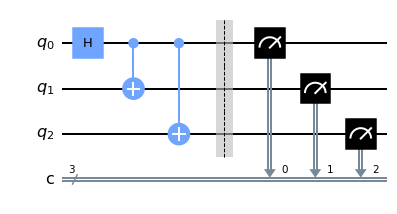

In [16]:
qc.draw('mpl')

In [13]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [14]:
counts = result_sim.get_counts(qc)
print(counts)

{'000': 506, '111': 518}


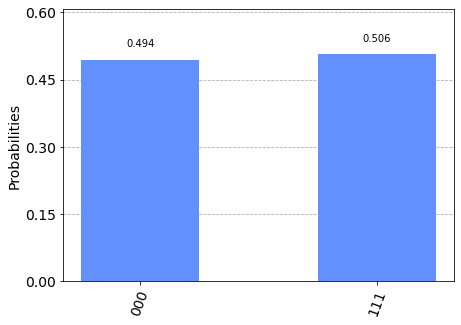

In [15]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)